<a href="https://colab.research.google.com/github/aka5hbansal/ML-MODEL-CAT-DOG/blob/main/CatAndDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob


In [ ]:
!wget https://www.dropbox.com/s/fyf8a7bmkgfhdiy/archive.zip?dl=0
!unzip /content/archive.zip?dl=0



In [ ]:
TRAIN_DIR="./DATASET"
ORG_DIR="/content/training_set"
CLASS=['cat','dog']

In [ ]:
for C in CLASS:
  DEST =os.path.join(TRAIN_DIR,C)

  if not os.path.exists(DEST):
    os.makedirs(DEST)

  for img_path in glob.glob(os.path.join(ORG_DIR,C)+"*"):
    SRC=img_path

    shutil.copy(SRC,DEST)

MODEL BUILDING


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import keras

In [ ]:
base_model=InceptionV3(input_shape=(256,256,3),include_top=False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X=Flatten()(base_model.output)
X= Dense(units=2, activation='sigmoid')(X)

#final Model
model=Model(base_model.input,X)

#compile the model
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

#summary
model.summary()


pre process data using data generators


In [ ]:
train_datagen=ImageDataGenerator(featurewise_center=True,
                                 rotation_range=0.4,
                                 width_shift_range=0.3,
                                 horizontal_flip=True,
                                 preprocessing_function=preprocess_input,
                                 zoom_range=0.4,
                                 shear_range=0.4)
train_data=train_datagen.flow_from_directory(directory="/content/training_set/training_set",
                                             target_size=(256,256),
                                             batch_size=64)

Found 8005 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'cats': 0, 'dogs': 1}

#visualizing the data


In [ ]:
train_img,label=train_data.next()

In [ ]:
def plotImages(img_arr,label):
  """
  input : image array
  output : plot images
  """
  for idx,img in enumerate(img_arr):

    if idx <=10:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.show()


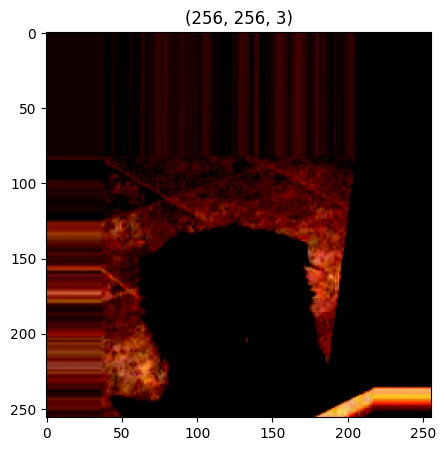

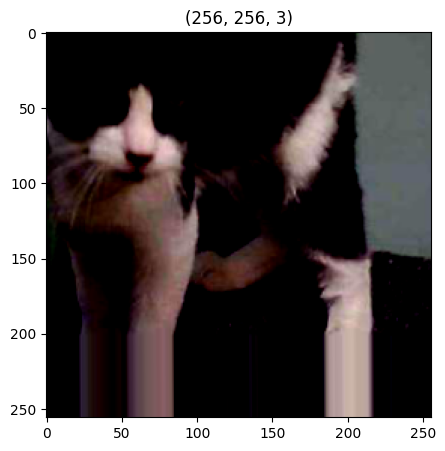

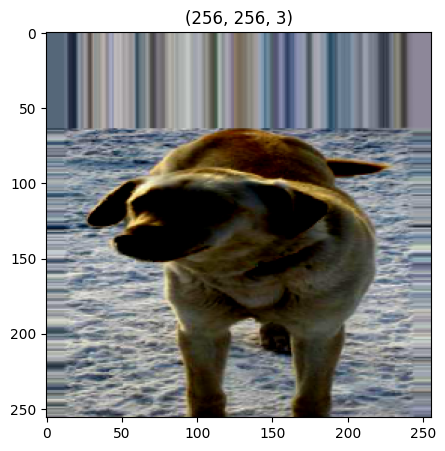

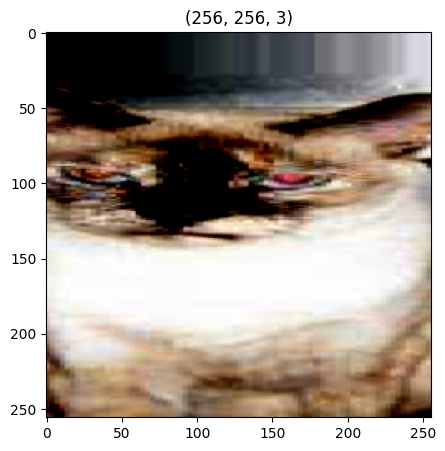

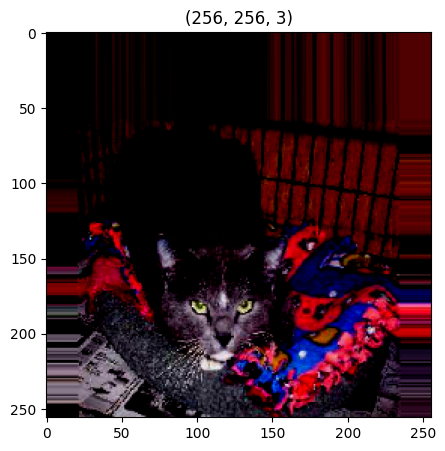

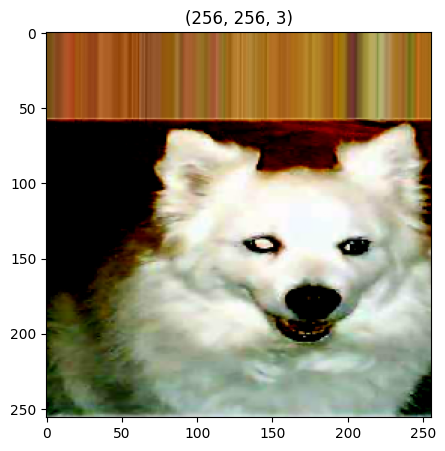

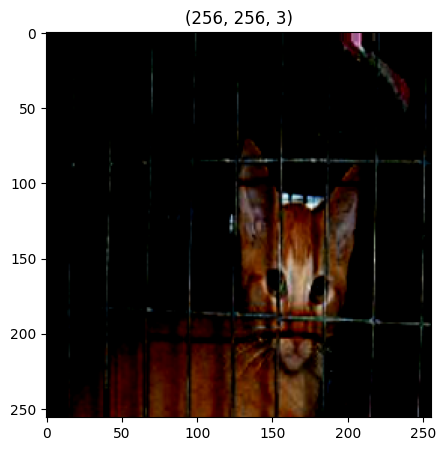

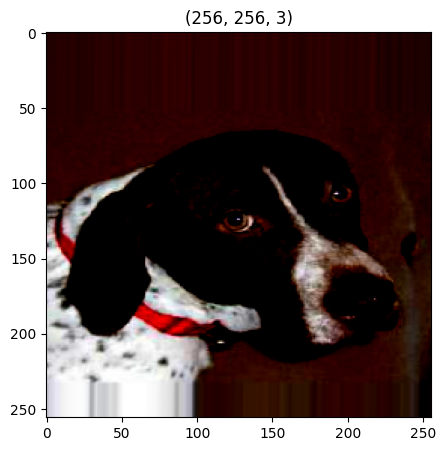

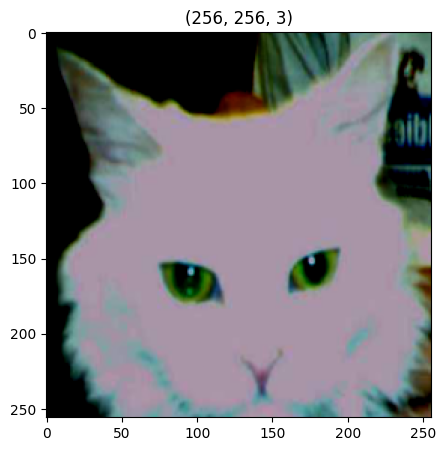

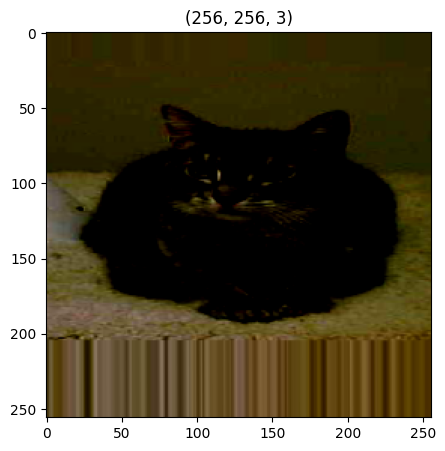

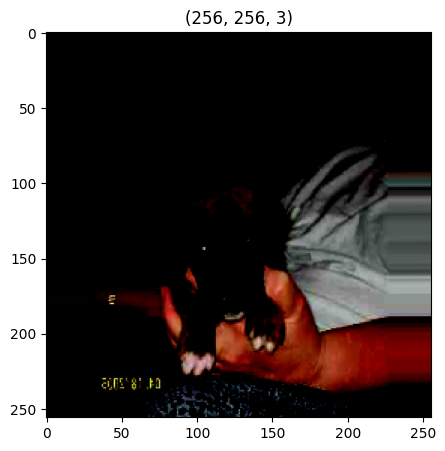

In [ ]:
plotImages(train_img,label)

#model checkpoint

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

mc=ModelCheckpoint(filepath="./best_model.h5",
                   monitor="accuracy",
                   verbose=1,
                   save_best_only=True)

es=EarlyStopping(monitor="accuracy",
                 min_delta=0.01,
                 patience=5,
                 verbose=1)

cb=[mc,es]



In [ ]:
his=model.fit_generator(train_data,
                        steps_per_epoch=10,
                        epochs=30,
                        callbacks=cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.4384 - accuracy: 0.8891 
Epoch 1: accuracy improved from -inf to 0.88906, saving model to ./best_model.h5
10/10 [==============================] - 123s 11s/step - loss: 0.4384 - accuracy: 0.8891
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.1020 - accuracy: 0.9797 
Epoch 2: accuracy improved from 0.88906 to 0.97969, saving model to ./best_model.h5
10/10 [==============================] - 112s 11s/step - loss: 0.1020 - accuracy: 0.9797
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.1839 - accuracy: 0.9750 
Epoch 3: accuracy did not improve from 0.97969
10/10 [==============================] - 110s 11s/step - loss: 0.1839 - accuracy: 0.9750
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.1889 - accuracy: 0.9797 
Epoch 4: accuracy did not improve from 0.97969
10/10 [==============================] - 108s 11s/step - loss: 0.1889 - accuracy: 0.9797
Epoch

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.h5")


In [ ]:
h=his.history
h.keys()


dict_keys(['loss', 'accuracy'])

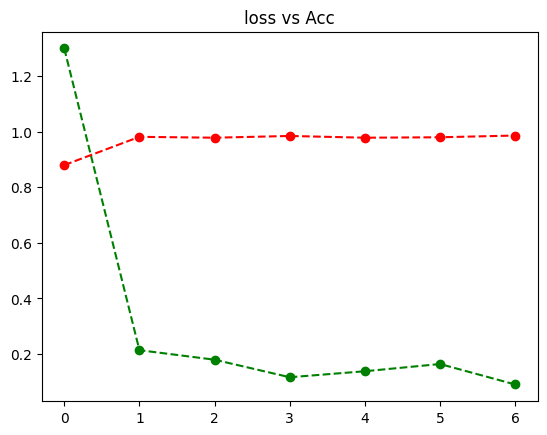

In [ ]:
plt.plot(h['loss'], 'go--')
plt.plot(h['accuracy'] , 'go--',c="red")

plt.title("loss vs Acc")
plt.show()

validate our model

1/1 [==============================] - 2s 2s/step


the image is of dog


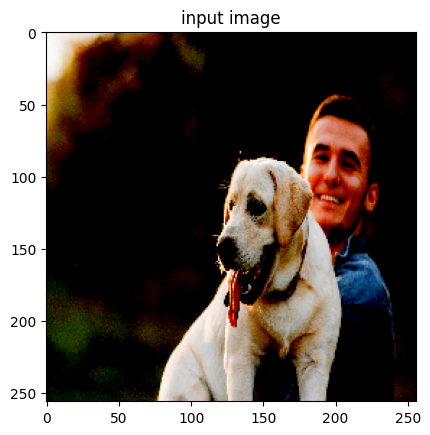

In [ ]:
path="/content/guy-holding-his-friend-dog-labrador-smiling-sunset.jpg"
img=load_img(path,target_size=(256,256))

i=img_to_array(img)
i=preprocess_input(i)
input_arr=np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))

if pred==0:
  print("the image is of cat")
else:
  print("the image is of dog")

plt.imshow(input_arr[0])
plt.title("input image")
plt.axis=False
plt.show()



1/1 [==============================] - 0s 171ms/step


the image is of cat


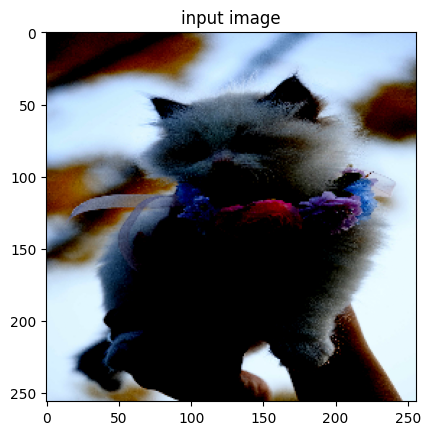

In [17]:
path="/content/pexels-peng-louis-1643457.jpg"
img=load_img(path,target_size=(256,256))

i=img_to_array(img)
i=preprocess_input(i)
input_arr=np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))

if pred==0:
  print("the image is of cat")
else:
  print("the image is of dog")

plt.imshow(input_arr[0])
plt.title("input image")
plt.axis=False
plt.show()